In [4]:
import os
# Jupyter notebook


path_Data = "E:\\MSE\\HomeWork\\Python\\Buoi3\\OnClass\\B\\Cross and Up Selling Problem\\"
checkPath = os.path.isdir(path_Data)
checkFile = os.path.isfile(path_Data + "grocery_dataset.txt")


print("The path and file are valid or not :", checkPath, checkFile)


The path and file are valid or not : True True


In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
grocery_items = set()
with open(path_Data + "grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=',')
    for i, line in enumerate(reader):
        grocery_items.update(line)


In [7]:
display(grocery_items)
print(len(grocery_items))


{'Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen m

169


In [14]:
outputList = list()

with open(path_Data + "grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=',')
    for i, line in enumerate(reader):
        rowval = {item: 0 for item in grocery_items}
        rowval.update({item: 1 for item in line})
        outputList.append(rowval)

print(len(outputList))
df = pd.DataFrame(outputList)
display(df.head())


9835


,finished products,bags,soda,berries,pasta,kitchen towels,pastry,cereals,citrus fruit,dessert,...,meat,tidbits,rolls/buns,hamburger meat,ketchup,zwieback,frozen meals,shopping bags,napkins,organic sausage
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# View top sold items
total_item_count = sum(df.sum())
print(total_item_count)
item_summary_df = df.sum().sort_values(
    ascending=False).reset_index().head(n=20)
item_summary_df.rename(columns={
                       item_summary_df.columns[0]: 'item_name', item_summary_df.columns[1]: 'item_count'}, inplace=True)
item_summary_df.head()


43367


,item_name,item_count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372


Text(0.5, 1.0, 'Item sales distribution')

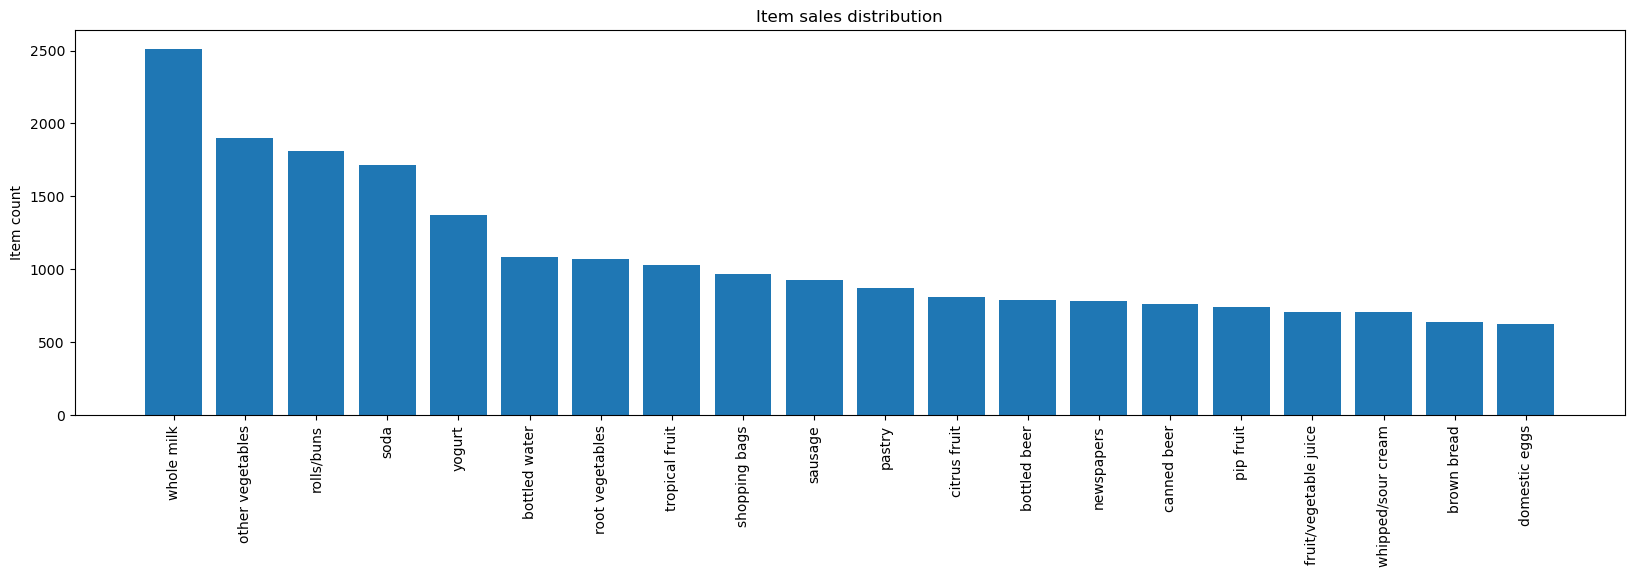

In [48]:
# Visualize top sold items
objects = (list(item_summary_df['item_name']))
x_pos = np.arange(len(objects))
performance = list(item_summary_df['item_count'])
plt.figure(figsize=(20, 5))
plt.bar(x_pos, performance)
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')


In [55]:
item_summary_df['item_perc'] = item_summary_df['item_count']/total_item_count
item_summary_df['total_prec'] = item_summary_df['item_perc'].cumsum()

item_summary_df.head(20)


,item_name,item_count,item_perc,total_prec
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651
9,sausage,924,0.021307,0.331957


In [52]:
item_summary_df[item_summary_df['item_perc'] > 0.05]


,item_name,item_count,item_perc,total_prec
0,whole milk,2513,0.057947,0.057947


In [54]:
input_df = df.copy()
item_count = input_df.sum().sort_values(ascending=False).reset_index()
display(item_count)


,index,0
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
...,...,...
164,bags,4
165,kitchen utensil,4
166,preservation products,2
167,sound storage medium,1


In [57]:
input_df['total_items'] = df.sum(axis=1)
display(input_df.head())


,finished products,bags,soda,berries,pasta,kitchen towels,pastry,cereals,citrus fruit,dessert,...,tidbits,rolls/buns,hamburger meat,ketchup,zwieback,frozen meals,shopping bags,napkins,organic sausage,total_items
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
